# 0. Setting for Analaysis 
## 0.1 Load packages


In [22]:
import os 
import pandas as pd 
import numpy as np
import math
import random 
import time 
import math 
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial
from scipy.special import psi

from sklearn.model_selection import train_test_split
import sklearn
import sklearn.pipeline
import sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.stats import t

import  os
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings( 'ignore' )

In [23]:

FILE_PATH = "C:/Users/annie/Dropbox/Research/data"
csv_path = os.path.join(FILE_PATH, "sat.csv")
pd.read_csv(csv_path)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,label
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,0
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,0
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,0
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,0
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,60,83,96,85,64,87,100,88,64,83,...,92,66,87,108,89,63,83,104,85,0
6431,64,79,100,85,56,71,96,85,56,68,...,85,66,83,100,85,63,83,100,81,0
6432,56,68,91,81,56,64,91,81,53,64,...,81,59,87,96,81,63,83,92,74,1
6433,56,68,87,74,60,71,91,81,60,64,...,74,59,83,92,74,59,83,92,70,1


In [17]:

FILE_PATH = "C:/Users/annie/Dropbox/Research/data"
csv_path = os.path.join(FILE_PATH, "satellite2.csv")
pd.read_csv(csv_path)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,Target
0,46,40,119,139,42,30,135,157,42,30,...,113,50,46,111,116,44,31,131,142,Anomaly
1,47,37,119,133,44,34,124,143,44,34,...,85,50,39,118,132,43,29,133,143,Anomaly
2,80,95,100,74,64,64,104,96,46,36,...,81,82,91,92,78,78,83,96,74,Anomaly
3,56,51,72,60,59,54,72,60,59,51,...,50,57,55,74,61,57,55,78,65,Anomaly
4,44,34,129,140,44,34,124,136,44,34,...,139,43,31,128,135,43,29,128,132,Anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,60,83,100,81,60,83,96,85,64,87,...,85,66,91,104,92,66,87,108,89,Normal
5096,64,83,104,88,64,79,100,85,56,71,...,85,63,83,100,85,66,83,100,85,Normal
5097,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,Normal
5098,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,Normal


## 0.1 Load Data Set
- credit_card data from kaggle (originally kdd-cup)


In [2]:
def real_data_sat(n):
    import  os
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    import random
    import sklearn
    import sklearn.pipeline
    import sklearn.preprocessing

    FILE_PATH = "C:/Users/annie/Dropbox/Research/data"
    csv_path = os.path.join(FILE_PATH, "sat.csv")
    df = pd.read_csv(csv_path)
    df_x_values = df.drop(['label'], axis=1)
    # z-normalization 
    from sklearn.preprocessing import StandardScaler
    scaler1 = StandardScaler()
    df_x_scaled = scaler1.fit_transform(df_x_values)
    y = df.loc[:,['label']]
    df_final = pd.concat([pd.DataFrame(df_x_scaled),pd.DataFrame(y)],axis=1)

    cc_data = df_final.values    #convert pandas dataframe to numpy array
    cc_data.shape  # shape -> (284807, 30)
    cc_data_normal1 = cc_data[cc_data[:,36]==0]    #without 'Time'
    cc_data_normal2 = pd.DataFrame(cc_data_normal1).sample(n)
    cc_data_normal = np.array(cc_data_normal2)    
    cc_data_fraud = cc_data[cc_data[:,36]==1]

    from sklearn.model_selection import train_test_split
    train_total_data_normal, test_total_data_normal, y_train_normal, y_test_normal = train_test_split(cc_data_normal, cc_data_normal[:,36], test_size=0.1, random_state=1004)

    def process_state(state):
        scaled = scaler.transform(state)
        return scaled
    cc_data_full_final = np.concatenate((cc_data_normal[:,:36],cc_data_fraud[:,:36]), axis=0)    
    total_training_instances = len(train_total_data_normal)
    test_total_data = np.concatenate((cc_data_fraud, test_total_data_normal), axis=0)
    
    return train_total_data_normal, test_total_data_normal, y_train_normal,y_test_normal, test_total_data, total_training_instances, train_total_data_normal,test_total_data, cc_data_full_final 


# 1. DAGMM(EM) model 
## 1.1 Model for no batches



## 1.2 Model for batches
- 배치 있는 모형


In [10]:
from SKN import *

def dasknem(train_total_data_normal, test_total_data_normal, y_train_normal, y_test_normal, total_training_instances, test_total_data, cc_data_full_final, 
            n_epochs=50, z_dim=1, lr=0.001, batch_size=1024, n_hidden1=25, n_hidden2=20, n_hidden3=10, n_layer1=10, lamda1=0.1, thres_point=0.99):
    #######################################################################################
    
    import tensorflow as tf
    import numpy as np
    from scipy.optimize import minimize_scalar
    from sklearn.mixture import GaussianMixture
    from numpy import random

    tf.reset_default_graph() 
    #그래프 초기화 bias/weight initial 돌릴때마다 새로 줄거기때문 
    training = tf.placeholder_with_default(False, shape=())   
    
    
    def encoder(x, z_dim, n_hidden1, n_hidden2, n_hidden3, dropout_prob_paper):

        with tf.variable_scope("encoder"):
            init_xavier = tf.contrib.layers.xavier_initializer()
            #he_init = tf.contrib.layers.variance_scaling_initializer()
            hidden1 = tf.layers.dense(x, n_hidden1, tf.nn.tanh, init_xavier)
            hidden2 = tf.layers.dense(hidden1, n_hidden2, tf.nn.tanh, init_xavier)
            hidden2_drop = tf.layers.dropout(hidden2, dropout_prob, training=training)
            hidden3 = tf.layers.dense(hidden2_drop, n_hidden3, tf.nn.tanh, init_xavier)
            hidden3_drop = tf.layers.dropout(hidden3, dropout_prob, training=training)
            z_comp = tf.layers.dense(hidden3_drop,z_dim,None, init_xavier)
        return z_comp

    def decoder(z_comp, x_dim, n_hidden1, n_hidden2, n_hidden3,dropout_prob_paper, reuse=False):

        with tf.variable_scope("decoder"):
            init_xavier = tf.contrib.layers.xavier_initializer()
            #he_init = tf.contrib.layers.variance_scaling_initializer()
            hidden3 = tf.layers.dense(z_comp, n_hidden3, tf.nn.tanh, init_xavier)
            hidden3_drop = tf.layers.dropout(hidden3, dropout_prob, training=training)
            hidden2 = tf.layers.dense(hidden3_drop, n_hidden2, tf.nn.tanh, init_xavier)
            hidden2_drop = tf.layers.dropout(hidden2, dropout_prob, training=training)
            hidden1 = tf.layers.dense(hidden2_drop, n_hidden1, tf.nn.tanh, init_xavier)
            x_hat_logits = tf.layers.dense(hidden1, x_dim, None, init_xavier)
            #x_hat_sigmoid = tf.sigmoid(x_hat_logits)
        return x_hat_logits
         
    
    def skewem(z):
        max_attempts = 3  # 최대 재시도 횟수
        best_ksi, best_sigma, best_lambd, best_log_lik = None, None, None, None
        for _ in range(max_attempts):
            try:
                ksi, sigma, lambd, log_lik  = skn_em_diag(z, tol=1e-4, max_iter=15)
                if best_log_lik is None or log_lik > best_log_lik:
                    best_ksi, best_sigma, best_lambd, best_log_lik = ksi, sigma, lambd, log_lik
            except Exception as e:
                print(f"An error occurred: {e}")
                print("Restarting the EM algorithm...")
                continue
        if best_ksi is not None:
            return best_ksi, best_sigma, best_lambd
        else:
            raise RuntimeError("Failed to converge after multiple attempts")
    
    def compression_autoencoder(x, x_dim, z_dim, n_hidden1, n_hidden2, n_hidden3, dropout_prob):
        
        z_comp = encoder(x, z_dim, n_hidden1, n_hidden2, n_hidden3, dropout_prob)
        x_hat = decoder(z_comp, x_dim, n_hidden1, n_hidden2, n_hidden3, dropout_prob)
        
    
        #relative euclidean distance --------------------------------------------
        ae_loss = tf.reduce_mean(tf.squared_difference(x,x_hat)) 
        recon_error = x - x_hat
        
        # euclidean distance 
        recon_error_magnitude = tf.cast(tf.norm(
                recon_error, ord='euclidean', axis=1, keep_dims=True),tf.float32) #tensor of shape (batch_size, 1)
        
        recon_denom = tf.cast(tf.sqrt(tf.reduce_sum(tf.square(x),axis=1)),tf.float32)
      
        # relatvie euclidean distance로 코드 수정  -------------------------------
        # 10000 수정해줘야함 
        #recon_denom = tf.cast(tf.sqrt(tf.reduce_sum(tf.square(t1),axis=1)),tf.float32)
        rel_euclidean_temp = recon_error_magnitude / recon_denom 
        relative_euclidean = tf.transpose(tf.slice(rel_euclidean_temp, [1,0],[1,batch_size]))
        
        # cosine similarity ----------------------------------------------------
        x_unit = tf.nn.l2_normalize(x, dim=1)    
        x_hat_unit = tf.nn.l2_normalize(x_hat, dim=1)
        cos_similarity=tf.reduce_sum(
                   tf.multiply(x_unit ,x_hat_unit),axis=1,keep_dims=True) #shape = (batch_size,1)

      
        return z_comp, x_hat, ae_loss, recon_error_magnitude, cos_similarity 
    
    
    
    def energy_density(z_val, ksi, sigma, lambd ):
        
        likelihood = skn_pdf(z_val, ksi, sigma, lambd)
        energy_value = -np.log(likelihood)
        energy_value_tensor = tf.convert_to_tensor(energy_value, dtype=np.float32)
        
        return  energy_value
    
  ##################################################################################
    
    def threshold_func(energy_input, location):
        
        energy_sort = np.sort(energy_input, axis=0)
        count, bins_count = np.histogram(energy_sort, bins=100) # 0.8 부터 가파르게 오름 
        pdf = count / sum(count)
        cdf = np.cumsum(pdf)
        
        thres_loc = int(len(energy_sort)*location)
        threshold = energy_sort[thres_loc]
        plt.plot(bins_count[1:], cdf, label = "CDF") 

        return threshold 
    
    def find_optimal_threshold(test_labels, energy_value_test, energy_value_full):
        f1_scores = []  # F1 스코어를 저장할 리스트
        thres_points = []  # thres_point 값을 저장할 리스트

        for thres_point in np.arange(0.6, 1, 0.001):  # 예시: 0부터 1까지 0.01 간격으로 시도
            thres = threshold_func(energy_value_full, thres_point)
            f1_result, _, _, _, _, _, _ = f1_func(test_labels, energy_value_test, thres)

            f1_scores.append(f1_result)
            thres_points.append(thres_point)

        max_f1_index = np.argmax(f1_scores)  # 최대 F1 스코어의 인덱스 찾기
        best_threshold = thres_points[max_f1_index]  # 해당 인덱스에 대응하는 thres_point 값 찾기
        best_f1_score = f1_scores[max_f1_index]  # 최대 F1 스코어 찾기

        return best_threshold
  ##################################################################################

    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

    # threshold (energy cdf 가파르게 올라가는 지점 기준으로 임계값): 임계값 구하기 
    # confusion matrix 
    def get_confusion_matrix_values(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

    def f1_func(labels, energy_input, thres):
        
        prediction = (energy_input >= thres).astype(int)
        pred = prediction.reshape(-1)
        real_labels = labels.astype(int)
        
        confusion = confusion_matrix(real_labels, pred)
        accuracy = accuracy_score(real_labels, pred) 
        precision = precision_score(real_labels, pred)
        recall = recall_score(real_labels, pred)
        f1 = f1_score(real_labels, pred)
        
        TN, FP, FN, TP = get_confusion_matrix_values(real_labels, pred)
    
        
        #print('f1:{}, 정밀도:{}, 재현율:{}'.format(f1, precision, recall))
        #print(confusion)
        #print(TP,FP,FN,TN)
        return f1, precision, recall, TP, FP, FN, TN 

    ###############################################################################
 
    x_dim = cc_data_full_final.shape[1]
    d = z_dim+2  #z_dim임 
    
    dropout_prob = tf.placeholder(tf.float32, name='dropout_prob')
    dropout_prob_paper = tf.placeholder(tf.float32, name='dropout_prob_paper')
    
    x = tf.placeholder(tf.float32, shape=[None, x_dim]) #input data 형태 만들어줌
    energy = tf.placeholder(tf.float32, shape=[None, ])
    
    z_comp, x_hat, ae_loss, recon_error_magnitude, cos_similarity = compression_autoencoder(x, x_dim, z_dim, n_hidden1, n_hidden2, n_hidden3, dropout_prob)
    z_concat =  tf.concat([z_comp, recon_error_magnitude , cos_similarity ], axis=1)
    
    energy_loss = tf.reduce_mean(energy) 
    total_loss = ae_loss + lamda1*energy_loss 
    
    # training은 weight/bias update를 위함. 따라서, network 있는 곳만 optimization 
    t_vars = tf.trainable_variables()
    all_training_vars = [var for var in t_vars if "encoder" or "decoder" in var.name]
    training_op = tf.train.AdamOptimizer(lr).minimize(total_loss, var_list= all_training_vars)
    number_of_batches = int(total_training_instances / batch_size)
    
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        
        #np.random.shuffle(train_total_data_normal) # batch 돌릴때 

        np.random.shuffle(train_total_data_normal) 
        train_data_ = train_total_data_normal[:, 0:x_dim]
        train_label_ = train_total_data_normal[:, x_dim]
        # test data #####################################
        test_data = test_total_data[:,0:x_dim]
        test_labels = test_total_data[:,x_dim]
        ######################################          
                
        z_val = sess.run((z_concat),feed_dict={x: train_data_,
                                           dropout_prob : 0.0,
                                           dropout_prob_paper : 0.0,
                                           training: False})
        
        ksis, sigmas, lambds = skewem(z_val)
        
        energy_value = energy_density(z_val, ksis, sigmas, lambds)
        
        _,  total_loss_val, ae_loss_val  = sess.run((training_op, total_loss,ae_loss),
                                                    feed_dict={x: train_data_,
                                                               energy: energy_value,
                                                               dropout_prob : 0.5,
                                                               dropout_prob_paper : 0.5,
                                                               training: True})
             
        z_val_new = sess.run((z_concat),feed_dict={x: train_data_, dropout_prob : 0.0, dropout_prob_paper : 0.0,training: False})
        ksis_new, sigmas_new, lambds_new = skewem(z_val_new)       
        energy_value_new = energy_density(z_val_new, ksis_new, sigmas_new, lambds_new)
        ae_loss_value =  sess.run((ae_loss),
                                 feed_dict={x: train_data_,
                                            energy: energy_value_new,
                                            dropout_prob : 0.0, 
                                            dropout_prob_paper : 0.0,
                                            training: False})
        
        total_loss_val =  sess.run((total_loss), 
                                  feed_dict={x: train_data_,
                                             energy: energy_value_new,
                                             dropout_prob : 0.0,
                                             dropout_prob_paper : 0.0,
                                             training: False})

        # test value ----------------------------------------------------------------------------------------------------------
        
        z_val_test =sess.run((z_concat),feed_dict={x: test_data,
                                                    dropout_prob : 0.0,
                                                    dropout_prob_paper : 0.0,
                                                    training: False})
        
        energy_value_test = energy_density(z_val_test, ksis_new, sigmas_new, lambds_new)
        
        z_val_full = sess.run((z_concat),feed_dict={x: cc_data_full_final,
                                                    dropout_prob : 0.0, 
                                                    dropout_prob_paper : 0.0,
                                                    training: False})
                
        energy_value_full= energy_density(z_val_full, ksis_new, sigmas_new, lambds_new)
        energy_value_full[energy_value_full == np.inf] = np.max(energy_value_full[energy_value_full != np.inf])
        
        best_threshold = find_optimal_threshold(test_labels, energy_value_test, energy_value_full)
        thres = threshold_func(energy_value_full, best_threshold)
        f1_result, precision_result, recall_result, TP_result, FP_result, FN_result, TN_result  = f1_func(test_labels, energy_value_test, thres)

    
    return z_val_test, f1_result, precision_result, recall_result, total_loss_val, ae_loss_value, TP_result, FP_result, FN_result, TN_result, energy_value_test, best_threshold


# 2. 데이터 적용
## 2.1 batches

0
f1_score 0.829281767955801 FPR_avg = 0.2075 precision_avg = 0.94760101010101 recall_avg = 0.7372298624754421 TP_avg= 1501 FP_avg= 83 FN_avg= 535 TN_avg= 317 Best_Threshold= 0.6
1
f1_score 0.7496373658253553 FPR_avg = 0.2975 precision_avg = 0.9156626506024096 recall_avg = 0.6345776031434185 TP_avg= 1292 FP_avg= 119 FN_avg= 744 TN_avg= 281 Best_Threshold= 0.601
2
f1_score 0.7737686139747995 FPR_avg = 0.2625 precision_avg = 0.9278846153846154 recall_avg = 0.6635559921414538 TP_avg= 1351 FP_avg= 105 FN_avg= 685 TN_avg= 295 Best_Threshold= 0.6
3
f1_score 0.7686116700201208 FPR_avg = 0.265 precision_avg = 0.9265419265419266 recall_avg = 0.656679764243615 TP_avg= 1337 FP_avg= 106 FN_avg= 699 TN_avg= 294 Best_Threshold= 0.6
4
f1_score 0.7475276323443862 FPR_avg = 0.2925 precision_avg = 0.9165477888730386 recall_avg = 0.631139489194499 TP_avg= 1285 FP_avg= 117 FN_avg= 751 TN_avg= 283 Best_Threshold= 0.6
5
f1_score 0.7854113655640373 FPR_avg = 0.28 precision_avg = 0.9253830779480346 recall_avg

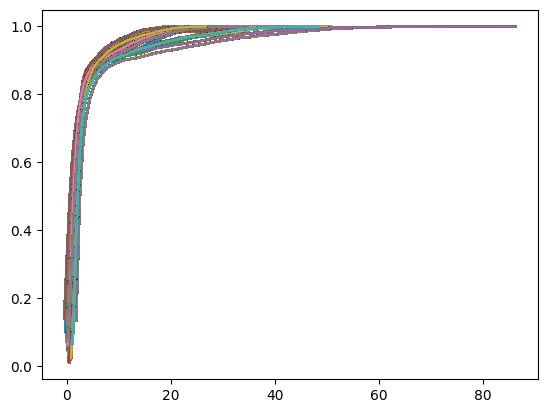

In [11]:
#lambda = 0.013, 1 

num_of_for = 20


ae_loss = np.zeros(shape=(num_of_for,1))
f1_value = np.zeros(shape=(num_of_for,1))
total_loss = np.zeros(shape=(num_of_for,1))
prec_value = np.zeros(shape=(num_of_for,1))
recal_value = np.zeros(shape=(num_of_for,1))

TP_value = np.zeros(shape=(num_of_for,1))
FP_value = np.zeros(shape=(num_of_for,1))
FN_value = np.zeros(shape=(num_of_for,1))
TN_value = np.zeros(shape=(num_of_for,1))
Thres = np.zeros(shape=(num_of_for,1))                

math.factorial(1234567) 
start = time.time() 

#mu_full = pd.DataFrame()
for i in range(0, num_of_for):
    np.random.seed(7)
    print(i)
    train_total_data_normal, test_total_data_normal, y_train_normal,y_test_normal, test_total_data, total_training_instances, train_total_data_normal,test_total_data, cc_data_full_final  = real_data_sat(4000)
    z_vec, f1_score, precision_val, recall_val,  loss_val, ae_loss_val, TP_val, FP_val, FN_val, TN_val, energy_value, best_thres  =  dasknem(train_total_data_normal, test_total_data_normal, y_train_normal, y_test_normal, total_training_instances, test_total_data, cc_data_full_final, 
                                                                                                                                 n_epochs=50, z_dim=1, lr=0.001, batch_size=1024, n_hidden1=25, n_hidden2=20, n_hidden3=10, n_layer1=10, lamda1=0.067, thres_point=0.99) 
    print("f1_score", f1_score,
          "FPR_avg =", (FP_val)/(FP_val+TN_val),
          "precision_avg =", precision_val,
          "recall_avg =", recall_val,
          "TP_avg=", TP_val,
          "FP_avg=", FP_val,
          "FN_avg=", FN_val,
          "TN_avg=", TN_val,
         "Best_Threshold=",best_thres)

    ae_loss[i] = ae_loss_val 
    f1_value[i] = f1_score

    total_loss[i] = loss_val 
    prec_value[i] = precision_val 
    recal_value[i] = recall_val

    TP_value[i] = TP_val 
    FP_value[i] = FP_val
    FN_value[i] = FN_val
    TN_value[i] = TN_val
    Thres[i] = best_thres    


print("f1_score_avg =", np.mean(f1_value),
  "f1_var=", np.var(f1_value),
  "precision_avg =", np.mean(prec_value),
  "recall_avg =", np.mean(recal_value),
  "FPR_avg =", np.mean(FP_value)/(np.mean(FP_value)+np.mean(TN_value)),
  "TP_avg=", np.mean(TP_value),
  "FP_avg=", np.mean(FP_value),
  "FN_avg=", np.mean(FN_value),
  "TN_avg=", np.mean(TN_value),
 "Thres_avg=",np.mean(Thres))
end = time.time() 
print(f"{end-start:.5f} sec")

(pd.DataFrame(f1_value)).to_csv("DASKN(EM)_sat_F1.csv")

In [19]:
(pd.DataFrame(f1_value)).to_csv("DASKN(EM)_sat_F1.csv")

## 2.2  batches exist

In [24]:
def real_data_sat(n):
    import  os
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    import random
    import sklearn
    import sklearn.pipeline
    import sklearn.preprocessing

    FILE_PATH = "C:/Users/annie/Dropbox/Research/data"
    csv_path = os.path.join(FILE_PATH, "sat.csv")
    df = pd.read_csv(csv_path)
    df_x_values = df.drop(['label'], axis=1)
    # z-normalization 
    from sklearn.preprocessing import StandardScaler
    scaler1 = StandardScaler()
    df_x_scaled = scaler1.fit_transform(df_x_values)
    y = df.loc[:,['label']]
    df_final = pd.concat([pd.DataFrame(df_x_scaled),pd.DataFrame(y)],axis=1)

    cc_data = df_final.values    #convert pandas dataframe to numpy array
    cc_data.shape  # shape -> (284807, 30)
    cc_data_normal2 = cc_data[cc_data[:,36]==0]    #without 'Time'
    #cc_data_normal2 = pd.DataFrame(cc_data_normal1).sample(n)
    cc_data_normal = np.array(cc_data_normal2)    
    cc_data_fraud = cc_data[cc_data[:,36]==1]

    from sklearn.model_selection import train_test_split
    train_total_data_normal, test_total_data_normal, y_train_normal, y_test_normal = train_test_split(cc_data_normal, cc_data_normal[:,36], test_size=0.1, random_state=1004)

    def process_state(state):
        scaled = scaler.transform(state)
        return scaled
    cc_data_full_final = np.concatenate((cc_data_normal[:,:36],cc_data_fraud[:,:36]), axis=0)    
    total_training_instances = len(train_total_data_normal)
    test_total_data = np.concatenate((cc_data_fraud, test_total_data_normal), axis=0)
    
    return train_total_data_normal, test_total_data_normal, y_train_normal,y_test_normal, test_total_data, total_training_instances, train_total_data_normal,test_total_data, cc_data_full_final 


0
f1_score 0.8321487151448879 FPR_avg = 0.22727272727272727 precision_avg = 0.938347718865598 recall_avg = 0.7475442043222004 TP_avg= 1522 FP_avg= 100 FN_avg= 514 TN_avg= 340 Best_Threshold= 0.6
1
f1_score 0.7273264401772527 FPR_avg = 0.2681818181818182 precision_avg = 0.9125277983691623 recall_avg = 0.6046168958742633 TP_avg= 1231 FP_avg= 118 FN_avg= 805 TN_avg= 322 Best_Threshold= 0.6
2
f1_score 0.8192371475953566 FPR_avg = 0.22727272727272727 precision_avg = 0.9367888748419722 recall_avg = 0.7278978388998035 TP_avg= 1482 FP_avg= 100 FN_avg= 554 TN_avg= 340 Best_Threshold= 0.6
3
f1_score 0.7930258717660293 FPR_avg = 0.25 precision_avg = 0.9276315789473685 recall_avg = 0.6925343811394892 TP_avg= 1410 FP_avg= 110 FN_avg= 626 TN_avg= 330 Best_Threshold= 0.6
4
f1_score 0.736934306569343 FPR_avg = 0.28863636363636364 precision_avg = 0.9085673146148309 recall_avg = 0.6198428290766208 TP_avg= 1262 FP_avg= 127 FN_avg= 774 TN_avg= 313 Best_Threshold= 0.6
5
f1_score 0.8206401766004415 FPR_avg 

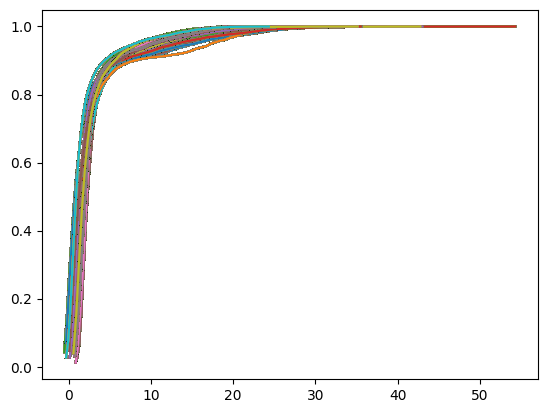

In [25]:
#lambda = 0.013, 1 

num_of_for = 20


ae_loss = np.zeros(shape=(num_of_for,1))
f1_value = np.zeros(shape=(num_of_for,1))
total_loss = np.zeros(shape=(num_of_for,1))
prec_value = np.zeros(shape=(num_of_for,1))
recal_value = np.zeros(shape=(num_of_for,1))

TP_value = np.zeros(shape=(num_of_for,1))
FP_value = np.zeros(shape=(num_of_for,1))
FN_value = np.zeros(shape=(num_of_for,1))
TN_value = np.zeros(shape=(num_of_for,1))
Thres = np.zeros(shape=(num_of_for,1))                

math.factorial(1234567) 
start = time.time() 

#mu_full = pd.DataFrame()
for i in range(0, num_of_for):
    np.random.seed(7)
    print(i)
    train_total_data_normal, test_total_data_normal, y_train_normal,y_test_normal, test_total_data, total_training_instances, train_total_data_normal,test_total_data, cc_data_full_final  = real_data_sat(4000)
    z_vec, f1_score, precision_val, recall_val,  loss_val, ae_loss_val, TP_val, FP_val, FN_val, TN_val, energy_value, best_thres  =  dasknem(train_total_data_normal, test_total_data_normal, y_train_normal, y_test_normal, total_training_instances, test_total_data, cc_data_full_final, 
                                                                                                                                 n_epochs=50, z_dim=1, lr=0.001, batch_size=1024, n_hidden1=25, n_hidden2=20, n_hidden3=10, n_layer1=10, lamda1=0.067, thres_point=0.99) 
    print("f1_score", f1_score,
          "FPR_avg =", (FP_val)/(FP_val+TN_val),
          "precision_avg =", precision_val,
          "recall_avg =", recall_val,
          "TP_avg=", TP_val,
          "FP_avg=", FP_val,
          "FN_avg=", FN_val,
          "TN_avg=", TN_val,
         "Best_Threshold=",best_thres)

    ae_loss[i] = ae_loss_val 
    f1_value[i] = f1_score

    total_loss[i] = loss_val 
    prec_value[i] = precision_val 
    recal_value[i] = recall_val

    TP_value[i] = TP_val 
    FP_value[i] = FP_val
    FN_value[i] = FN_val
    TN_value[i] = TN_val
    Thres[i] = best_thres    


print("f1_score_avg =", np.mean(f1_value),
  "f1_var=", np.var(f1_value),
  "precision_avg =", np.mean(prec_value),
  "recall_avg =", np.mean(recal_value),
  "FPR_avg =", np.mean(FP_value)/(np.mean(FP_value)+np.mean(TN_value)),
  "TP_avg=", np.mean(TP_value),
  "FP_avg=", np.mean(FP_value),
  "FN_avg=", np.mean(FN_value),
  "TN_avg=", np.mean(TN_value),
 "Thres_avg=",np.mean(Thres))
end = time.time() 
print(f"{end-start:.5f} sec")

(pd.DataFrame(f1_value)).to_csv("DASKN(EM)_sat_F1.csv")

In [ ]:
import matplotlib.pyplot as plt
from SKNM import *
log = []
aic_values = []
bic_values = []

for i in range(1, 9):
    print(i)
    _, _, _, _, lik = sknm_em_diag(z_vec, i, tol=1e-4, max_iter=15)
    log.append(lik)
    
    # Calculate AIC and BIC directly and append to lists
    aic = 2 * (15*i-1) - 2 * lik
    bic = -2*(lik-0.5*(int(15*i)-1)*np.log(z_vec.shape[1]))
    print("aic :",aic)
    print("bic :",bic)
    aic_values.append(aic)
    bic_values.append(bic)


# Plotting
plt.plot(range(1,9), aic_values, label='AIC', marker='o')
plt.plot(range(1, 9), bic_values, label='BIC', marker='o')

# Finding the optimal i
#optimal_i_aic = np.argmin(aic_values) + 1
#optimal_i_bic = np.argmin(bic_values) + 1

# Highlighting the optimal i values
#plt.scatter(optimal_i_aic, min(aic_values), color='red', label=f'Optimal i (AIC={optimal_i_aic})', zorder=5)
#plt.scatter(optimal_i_bic, min(bic_values), color='blue', label=f'Optimal i (BIC={optimal_i_bic})', zorder=5)

# Adding labels and legend
plt.xlabel('i')
plt.ylabel('Criterion Value')
plt.title('AIC and BIC Values for Different Values of i')
plt.legend()

# Show the plot
plt.show()
